# Symptoms Based Disease Predition and Its Treatments
A Bangkit Final Project proposed by B21-CAP0170

There are a lot of diseases that you need to detect at an early stage to be able to identify the treatment plan early on and help the patient secure a good way to live. An early detection of disease and a precise diagnosis allows for quicker action, saving precious time, and to prevent complications and rapid worsening. Health practitioners have conducted surveys and collected data on patient information, their disease, and symptoms that allow them to distinguish the patient's disease with common symptoms. Therefore, the dataset can be used to train the model that predicts the disease based on the symptoms.

## Importing Library

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow_decision_forests as tfdf
import tensorflow as tf

In [19]:
# Read the dataset csv file
df = pd.read_csv("Dataset/dataset.csv")
df_precaution = pd.read_csv("Dataset/symptom_precaution.csv")
df_description = pd.read_csv("Dataset/symptom_description.csv")
df_precaution = df_precaution.fillna(0)
list_precautions = df_precaution.to_dict(orient='records')

[{'Disease': 'Drug Reaction',
  'Precautions': ['stop irritation',
   'consult nearest hospital',
   'stop taking drug',
   'follow up']},
 {'Disease': 'Malaria',
  'Precautions': ['Consult nearest hospital',
   'avoid oily food',
   'avoid non veg food',
   'keep mosquitos out']},
 {'Disease': 'Allergy',
  'Precautions': ['apply calamine',
   'cover area with bandage',
   'use ice to compress itching']},
 {'Disease': 'Hypothyroidism',
  'Precautions': ['reduce stress',
   'exercise',
   'eat healthy',
   'get proper sleep']},
 {'Disease': 'Psoriasis',
  'Precautions': ['wash hands with warm soapy water',
   'stop bleeding using pressure',
   'consult doctor',
   'salt baths']},
 {'Disease': 'GERD',
  'Precautions': ['avoid fatty spicy food',
   'avoid lying down after eating',
   'maintain healthy weight',
   'exercise']},
 {'Disease': 'Chronic cholestasis',
  'Precautions': ['cold baths',
   'anti itch medicine',
   'consult doctor',
   'eat healthy']},
 {'Disease': 'hepatitis A',
  

In [3]:
# Filter DataFrame to disease only (delete all symptom columns)
disease_only = df
for a in range(1, 18):
    disease_only = disease_only.drop([df.columns[a]], axis=1)

disease_only.head()

,Disease
0,Fungal infection
1,Fungal infection
2,Fungal infection
3,Fungal infection
4,Fungal infection


In [4]:
# Put all unique disease to a list
disease_list = disease_only['Disease'].unique().tolist()
print(f"Labels of diseases: {disease_list}")

Labels of diseases: ['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis', 'Drug Reaction', 'Peptic ulcer disease', 'AIDS', 'Diabetes', 'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine', 'Cervical spondylosis', 'Brain hemorrhage', 'Jaundice', 'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia', 'Dimorphic hemorrhoids', 'Heart attack', 'Varicose veins', 'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis', 'Arthritis', 'Benign paroxysmal positional vertigo', 'Acne', 'Urinary tract infection', 'Psoriasis', 'Impetigo']


In [5]:
# The total number of the diseases in the dataset
len(disease_list)

41

In [6]:
# Filter DataFrame to symptoms only (delete the disease column)
first_column = df.columns[0]
symptoms_only = df.drop([first_column], axis=1)

# Saving to new file
# df.to_csv('file.csv', index=False)

symptoms_only.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,itching,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,itching,skin_rash,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Put all unique symptoms to a list
symptoms = []

for i in range(1, 18):
    for x in symptoms_only[f'Symptom_{i}'].tolist():
        if str(x) != 'nan' and str(x) not in symptoms:
            symptoms.append(x)


print(f"Featured symptoms: {symptoms}")

Featured symptoms: ['itching', 'skin_rash', 'continuous_sneezing', 'shivering', 'stomach_pain', 'acidity', 'vomiting', 'indigestion', 'muscle_wasting', 'patches_in_throat', 'fatigue', 'weight_loss', 'sunken_eyes', 'cough', 'headache', 'chest_pain', 'back_pain', 'weakness_in_limbs', 'chills', 'joint_pain', 'yellowish_skin', 'constipation', 'pain_during_bowel_movements', 'breathlessness', 'cramps', 'weight_gain', 'mood_swings', 'neck_pain', 'muscle_weakness', 'stiff_neck', 'pus_filled_pimples', 'burning_micturition', 'bladder_discomfort', 'high_fever', 'nodal_skin_eruptions', 'ulcers_on_tongue', 'loss_of_appetite', 'restlessness', 'dehydration', 'dizziness', 'weakness_of_one_body_side', 'lethargy', 'nausea', 'abdominal_pain', 'pain_in_anal_region', 'sweating', 'bruising', 'cold_hands_and_feets', 'anxiety', 'knee_pain', 'swelling_joints', 'blackheads', 'foul_smell_of_urine', 'skin_peeling', 'blister', 'dischromic_patches', 'watering_from_eyes', 'extra_marital_contacts', 'diarrhoea', 'loss

In [8]:
# The total number of the symptoms in the dataset
len(symptoms)

131

In [9]:
# Get a list like this --> ['Symptom_1', Symptom_2, ..., Symptom_17 ]
cols = [i for i in df.iloc[:,1:].columns]
print(cols)

['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17']


In [10]:
# Turns all columns in 'cols' to variable column.
# The number of rows of tmp DataFrame is 17x from the original DataFrame

tmp = pd.melt(df.reset_index() ,id_vars = ['index'], value_vars = cols )

# Adding a value to each symptoms column by 1
tmp['add_value'] = 1
tmp.head()

,index,variable,value,add_value
0,0,Symptom_1,itching,1
1,1,Symptom_1,skin_rash,1
2,2,Symptom_1,itching,1
3,3,Symptom_1,itching,1
4,4,Symptom_1,itching,1


In [11]:
pd.set_option('display.max_columns', 150)

# Pivot table
diseases = pd.pivot_table(tmp, 
                          values = 'add_value',
                          index = 'index',
                          columns = 'value')

# Add labels column
diseases.insert(0,'label',df['Disease'])

# Fill NaN with zero
diseases = diseases.fillna(0)
# diseases.head()

symptoms_list = []
for column in diseases:
    if column != 'label':
        symptoms_list.append(column)

diseases.head()

value,label,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,blister,blood_in_sputum,bloody_stool,blurred_and_distorted_vision,breathlessness,brittle_nails,bruising,burning_micturition,chest_pain,chills,cold_hands_and_feets,coma,congestion,constipation,continuous_feel_of_urine,continuous_sneezing,cough,cramps,dark_urine,dehydration,depression,diarrhoea,dischromic_patches,distention_of_abdomen,dizziness,drying_and_tingling_lips,enlarged_thyroid,excessive_hunger,extra_marital_contacts,family_history,fast_heart_rate,fatigue,fluid_overload,foul_smell_of_urine,headache,high_fever,hip_joint_pain,history_of_alcohol_consumption,increased_appetite,indigestion,inflammatory_nails,internal_itching,irregular_sugar_level,irritability,irritation_in_anus,itching,joint_pain,knee_pain,lack_of_concentration,lethargy,loss_of_appetite,loss_of_balance,loss_of_smell,malaise,mild_fever,mood_swings,movement_stiffness,mucoid_sputum,muscle_pain,muscle_wasting,muscle_weakness,nausea,neck_pain,nodal_skin_eruptions,obesity,pain_behind_the_eyes,pain_during_bowel_movements,pain_in_anal_region,painful_walking,palpitations,passage_of_gases,patches_in_throat,phlegm,polyuria,prominent_veins_on_calf,puffy_face_and_eyes,pus_filled_pimples,receiving_blood_transfusion,receiving_unsterile_injections,red_sore_around_nose,red_spots_over_body,redness_of_eyes,restlessness,runny_nose,rusty_sputum,scurring,shivering,silver_like_dusting,sinus_pressure,skin_peeling,skin_rash,slurred_speech,small_dents_in_nails,spinning_movements,spotting_urination,stiff_neck,stomach_bleeding,stomach_pain,sunken_eyes,sweating,swelled_lymph_nodes,swelling_joints,swelling_of_stomach,swollen_blood_vessels,swollen_extremeties,swollen_legs,throat_irritation,toxic_look,ulcers_on_tongue,unsteadiness,visual_disturbances,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

# TensorFlow Decision Forests Algorithm

In [12]:
"""
Our dataset classification label is represented as a string.
Keras expected classification labels to be integers.
"""

# Assign the label column name to a variable
label = "label"

# Converting string to a unique integers for each diseases
diseases[label] = diseases[label].map(disease_list.index)
diseases.head()

value,label,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,blister,blood_in_sputum,bloody_stool,blurred_and_distorted_vision,breathlessness,brittle_nails,bruising,burning_micturition,chest_pain,chills,cold_hands_and_feets,coma,congestion,constipation,continuous_feel_of_urine,continuous_sneezing,cough,cramps,dark_urine,dehydration,depression,diarrhoea,dischromic_patches,distention_of_abdomen,dizziness,drying_and_tingling_lips,enlarged_thyroid,excessive_hunger,extra_marital_contacts,family_history,fast_heart_rate,fatigue,fluid_overload,foul_smell_of_urine,headache,high_fever,hip_joint_pain,history_of_alcohol_consumption,increased_appetite,indigestion,inflammatory_nails,internal_itching,irregular_sugar_level,irritability,irritation_in_anus,itching,joint_pain,knee_pain,lack_of_concentration,lethargy,loss_of_appetite,loss_of_balance,loss_of_smell,malaise,mild_fever,mood_swings,movement_stiffness,mucoid_sputum,muscle_pain,muscle_wasting,muscle_weakness,nausea,neck_pain,nodal_skin_eruptions,obesity,pain_behind_the_eyes,pain_during_bowel_movements,pain_in_anal_region,painful_walking,palpitations,passage_of_gases,patches_in_throat,phlegm,polyuria,prominent_veins_on_calf,puffy_face_and_eyes,pus_filled_pimples,receiving_blood_transfusion,receiving_unsterile_injections,red_sore_around_nose,red_spots_over_body,redness_of_eyes,restlessness,runny_nose,rusty_sputum,scurring,shivering,silver_like_dusting,sinus_pressure,skin_peeling,skin_rash,slurred_speech,small_dents_in_nails,spinning_movements,spotting_urination,stiff_neck,stomach_bleeding,stomach_pain,sunken_eyes,sweating,swelled_lymph_nodes,swelling_joints,swelling_of_stomach,swollen_blood_vessels,swollen_extremeties,swollen_legs,throat_irritation,toxic_look,ulcers_on_tongue,unsteadiness,visual_disturbances,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,

In [13]:
# Split dataset for training 70% and test 30%
train_7 = diseases.sample(frac = 0.7, random_state = 1)
test_7 = diseases.drop(index = train_7.index)

# Split dataset for training 80% and test 20%
train_8 = diseases.sample(frac = 0.8, random_state = 1)
test_8 = diseases.drop(index = train_8.index)

# Split dataset for training 90% and test 10%
train_9 = diseases.sample(frac = 0.9, random_state = 1)
test_9 = diseases.drop(index = train_9.index)

train = train_7
test = test_7

In [14]:
# Show shape of data
print(f'Shape of training data: {train.shape}')
print(f'Shape of test data: {test.shape}')

Shape of training data: (3444, 132)
Shape of test data: (1476, 132)


In [15]:
# Convert the pandas dataframe to tensorflow datasets
train_tfdf = tfdf.keras.pd_dataframe_to_tf_dataset(train, label=label)
test_tfdf = tfdf.keras.pd_dataframe_to_tf_dataset(test, label=label)

In [16]:
# Specify the model
model = tfdf.keras.RandomForestModel()

# Add evaluation metrics
model.compile(
    metrics=["accuracy"]
)

# Train the model
model.fit(train_tfdf)

54/54 [==============================] - 4s 5ms/step


In [17]:
# Show training logs
model.make_inspector().training_logs()

[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=1252, accuracy=0.8753993610223643, loss=4.491062018056266, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=12, evaluation=Evaluation(num_examples=3429, accuracy=0.9673374161563137, loss=0.5121840613229555, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=22, evaluation=Evaluation(num_examples=3444, accuracy=0.9863530778164924, loss=0.20547583939791003, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=32, evaluation=Evaluation(num_examples=3444, accuracy=0.990418118466899, loss=0.17705799939822617, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=42, evaluation=Evaluation(num_examples=3444, accuracy=0.9924506387921022, loss=0.14459201447021014, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=52, evaluation=Evaluation(num_examples=3444, accuracy=0.993321718931475, loss=0.1342634520732498, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=62, evaluation=Evaluation(num_examples=3444, accuracy=0.9

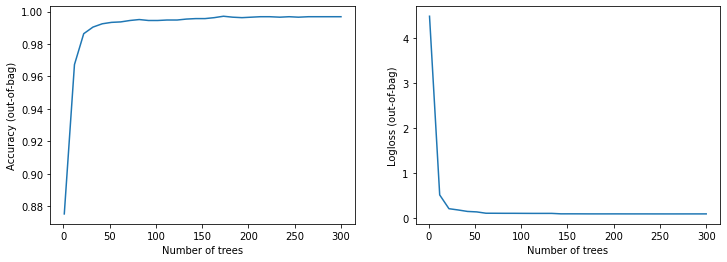

In [18]:
# Plotting the training logs

# Assign training logs data to a variable 
logs = model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

In [19]:
evaluation = model.evaluate(test_tfdf, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

24/24 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.9966

loss: 0.0000
accuracy: 0.9966


In [20]:
# Show overall structure of the model
model.summary()

Model: "random_forest_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (131):
	abdominal_pain
	abnormal_menstruation
	acidity
	acute_liver_failure
	altered_sensorium
	anxiety
	back_pain
	belly_pain
	blackheads
	bladder_discomfort
	blister
	blood_in_sputum
	bloody_stool
	blurred_and_distorted_vision
	breathlessness
	brittle_nails
	bruising
	burning_micturition
	chest_pain
	chills
	cold_hands_and_feets
	coma
	congestion
	constipation
	continuous_feel_of_urine
	continuous_sneezing
	cough
	cramps
	dark_urine
	dehydration
	depression
	diarrhoea
	dischromic_patches
	distention_of_abdomen
	dizziness
	drying_and_tingling_lips
	enlarged_thyroid
	excessive_hunger
	extra_marital_contacts
	family_history
	fast_

In [21]:
# Save the model to local directory
# model.save('saved_model/my_model')